# Boolean Variation
[BOLD: Boolean Logic Deep Learning](https://arxiv.org/pdf/2405.16339) introduced a mathematical theory to caculuate graidents on Boolean Variables. Below are some necessary info to realize the truth tables, define a Boolean Deep Learning model, and train the network using Backprop. See the paper for details. The following are taken from the paper.

In [ ]:
%load_ext autoreload
%autoreload 2
import os
import sys

module_path = os.path.abspath(os.path.join('../')) # or the path
sys.path.append(module_path)

from engine import Bool
import itertools
import pandas as pd
import numpy as np

# Boolean Variation
[BOLD: Boolean Logic Deep Learning](https://arxiv.org/pdf/2405.16339) introduced a mathematical theory to caculuate graidents on Boolean Variables. Below are some necessary info to realize the truth tables, define a Boolean Deep Learning model, and train the network using Backprop. See the paper for details. The following are taken from the paper.

## Definition

### Three-value and Mixed logic
1. Define $\mathcal{M} \equiv \mathcal{B} \cup \{0\}$ with logic connectives defined according to those of Boolean logic as follows. 
    - First, the negation is: $\neg True = False$, $\neg False = True$, and $\neg 0 = 0$. 
    - Second, let $\mathcal{L}$ be a logic connective, denote by $\mathcal{L}_{\mathcal{M}}$ and $\mathcal{L}_{\mathcal{B}}$ when it is in $\mathcal{M}$ and in $\mathcal{B}$, respectively, then $\mathcal{L}_{\mathcal{Mb}}(a,b) = \mathcal{L}_{\mathcal{Bb}}(a,b)$ for $a, b \in \mathcal{B}$ and $\mathcal{L}_{\mathcal{M}}(a,b) = 0$ otherwise.
2. Denote by $\mathcal{L}$ a logic set (e.g., $\mathcal{B}$ or $\mathcal{M}$), $\mathcal{R}$ the real set, $\mathcal{Z}$ the set of integers, $\mathcal{N}$ a numeric set (e.g., $\mathcal{R}$ or $\mathcal{Z}$), and $\mathcal{D}$ a certain set of $\mathcal{L}$ or $\mathcal{N}$.
3. For $x \in \mathcal{N}$, its logic value denoted by $x_{logic}$ is given as $x_{logic} = True \Leftrightarrow x > 0$, $x_{logic} = False \Leftrightarrow x < 0$, and $x_{logic} = 0 \Leftrightarrow x = 0$.
4. The magnitude of a variable $x$, denoted $|x|$, is defined as its usual absolute value if $x \in \mathcal{N}$. And for $x \in \mathcal{L}$: $|x| = 0$ if $x = 0$, and $|x| = 1$ otherwise.
5. For $\mathcal{L}$ a logic connective of $\mathcal{L}$ and variables $a$, $b$, operation $c = \mathcal{L}(a, b)$ is defined such that $|c| = |a||b|$ and $c_{logic} = \mathcal{L}(a_{logic}, b_{logic})$. 


### Calculus
1. A variable x is (extended) Boolean variable with the following encoding $x \in \{-1,0,1\}$ where $-1$ represents logical $False$, $+1$ represents logical $True$, and $0$ represents $Ignore$. We can call this extended Boolean domain.
2. Order relations $<$ and $>$ in $\mathcal{B}$ are defined as follows: $False < True$, and $True > False$.
3. For $a, b \in \mathcal{B}$, the variation from $a$ to $b$, denoted $\delta(a \to b)$, is defined as: $\delta(a \to b) \equiv True$ if $b > a$, $\equiv 0$ if $b = a$, and $\equiv False$ if $b < a$.
4. For $f \in \mathcal{F}(\mathcal{B}, \mathcal{D})$, $\forall x \in \mathcal{B}$, write $\delta f(x \to \neg x) := \delta(f(x) \to f(\neg x))$. The variation of $f$ w.r.t $x$, denoted $f'(x)$, is defined as: $f'(x) \equiv \text{xnor}(\delta(x \to \neg x), \delta f(x \to \neg x))$.

For simplicity, we will write $\delta f$ to denote $\delta f(x \to \neg x)$. Similarly, $\delta x$ to denote $\delta (x \to \neg x)$ 


For details see, Section 3.2 of [BOLD: Boolean Logic Deep Learning](https://arxiv.org/pdf/2405.16339)

### AND Gate
#### Truth Table

l
$AND(x_1,x_2) \equiv 0$ if any of the inputs are 0, by definition.

#### Derivative

Recall:
1. $\delta(a \to b) \equiv True$ if $b > a$, $\equiv 0$ if $b = a$, and $\equiv False$ if $b < a$.
2. $f'(x) \equiv \text{xnor}(\delta(x \to \neg x), \delta f(x \to \neg x))$.

The Truth Table for $f(x) = f_a(x) = AND(x,a)$ is:

| $a$ | $x$ | $\neg x$ | $\delta x$ | $f(x)$ |$f(\neg x)$ |  $\delta f$ | $f'$ 
|-----|-----|-----|-----| -----| -----|-----|-----|
T| T | F | F | T | F | F | T | 
T| F | T | T | F | T | T | T | 
F| T | F | F | F | F | 0 | 0 |
F| F | T | T | F | F | 0 | 0 |

Therefore, $f'_{a}(x) = \text{T} \text{ iff } a=T, 0 \text{ o.w}$


### OR Gate

#### Truth Table

| $x_1$ | $x_2$ | $y_{OR}$ | 
|-----|-----|-----|
T| T | T | 
T| F | T |
F| T | T | 
F| F | F |

$AND(x_1,x_2) \equiv 0$ if any of the inputs are 0, by definition.

#### Derivative

$f'_{a}(x) = \text{F} \text{ iff } a=F, 0 \text{ o.w}$

### XOR Gate

#### Truth Table

| $x_1$ | $x_2$ | $y_{XOR}$ | 
|-----|-----|-----|
T| T | F | 
T| F | T |
F| T | T | 
F| F | F |

$XOR(x_1,x_2) \equiv 0$ if any of the inputs are 0, by definition.

#### Derivative

$f'_{a}(x) = \neg a$


## AND Gate

In [2]:
# check AND gate. Logic and Derivative

def test_2ary(gate='AND'):
    A = [-1,1,0]
    X = [-1,1,0]
    data = []
    for element in itertools.product(*[A,X]):
        a,x = element
        xb = Bool(x)
        ab = Bool(a)
        if gate == 'AND':
            z = ab*xb
        elif gate == 'OR':
            z = ab+xb
        else:
            z = ab^xb
        
        z.backward()
        data.append({
                'a': a,
                'x': x,
                'f': z.data,
                'f\'': xb.grad
            })

    df = pd.DataFrame(data)
    return df
df = test_2ary()
print(df)

   a  x  f  f'
0 -1 -1 -1   0
1 -1  1 -1   0
2 -1  0  0   0
3  1 -1 -1   1
4  1  1  1   1
5  1  0  0   0
6  0 -1  0   0
7  0  1  0   0
8  0  0  0   0


Can see that $f'_a(x)$ is $1$ only when $a=1$, o.w it is 0.

## OR Gate

In [3]:
# check AND gate. Logic and Derivative
df = test_2ary(gate='OR')
print(df)

   a  x  f  f'
0 -1 -1 -1  -1
1 -1  1  1  -1
2 -1  0  0   0
3  1 -1  1   0
4  1  1  1   0
5  1  0  0   0
6  0 -1  0   0
7  0  1  0   0
8  0  0  0   0


Can see that $f'_a(x)$ is $-1$ only when $a=-1$, o.w it is 0.

## XOR Gate

In [4]:
# check AND gate. Logic and Derivative
df = test_2ary(gate='XOR')
print(df)

   a  x  f  f'
0 -1 -1 -1   1
1 -1  1  1   1
2 -1  0  0   0
3  1 -1  1  -1
4  1  1 -1  -1
5  1  0  0   0
6  0 -1  0   0
7  0  1  0   0
8  0  0  0   0


Can see that $f'_a(x)$ is $\neg a$ and is 0 when a is 0.

## Compositions


**Chain Rule**

For $\mathcal{B} \overset{f}{\to} \mathcal{B} \overset{g}{\to} \mathcal{D}$: $(g \circ f)'(x) = \text{xnor}(g'(f(x)), f'(x))$, $\forall x \in \mathcal{B}$.

**Multivariate Chain Rule**

1. For $x = (x_1, \ldots, x_n) \in \mathcal{B}^n$, denote $x_{\neg i} := (x_1, \ldots, x_{i-1}, \neg x_i, x_{i+1}, \ldots, x_n)$ for $n \ge 1$ and $1 \leq i \leq n$.

2. For $f \in \mathcal{F}(\mathcal{B}^n, \mathcal{B})$, the (partial) variation of $f$ wrt $x_i$, denoted $f'_{i}(x)$ or $\delta f(x)/\delta x_i$, is defined as: $f'_{i}(x) \equiv \delta f(x)/\delta x_i \equiv xnor(\delta(x_i \to \neg x_i), \delta f(x \to x_{\neg i}))$.

3.  Let $f \in \mathcal{F}(\mathcal{B}^n, \mathcal{B})$, $n \geq 1$, and $g \in \mathcal{F}(\mathcal{B}, \mathcal{B})$. For $1 \le i \le n$,

$$(g \circ f)'_i(x) = \text{xnor}(g'(f(x)), f'_i(x)), \quad \forall x \in \mathcal{B}^n$$


In [5]:

def test_Kary(expression = "x1*x2", K=2):
    T = [-1, 1, 0]
   
    # Create the Cartesian product of T repeated K times
    cartesian_product = list(itertools.product(T, repeat=K))
   
    # Generate variable names based on the index
    variable_names = [f'x{i+1}' for i in range(K)]

   
    data = []
    # Print the result with variable names and evaluate the expression
    for product in cartesian_product:
        # Create a dictionary of variable names and their corresponding values
        variables = {variable_names[i]: Bool(product[i]) for i in range(K)}
        
        # Evaluate the expression using the variables
        result = eval(expression, {}, variables)
        result.backward()

        tmp = variables
        tmp['f: '+ expression] = result.data
        tmp['f\'(x1)'] = variables['x1'].grad

        data.append(tmp)
    
    df = pd.DataFrame(data)
    return df

expression = "x1 * x2"
K = 2
df = test_Kary(expression=expression, K=K)
print(df)


                x1               x2  f: x1 * x2  f'(x1)
0  data:-1, grad:0  data:-1, grad:0          -1       0
1  data:-1, grad:1   data:1, grad:0          -1       1
2  data:-1, grad:0   data:0, grad:0           0       0
3   data:1, grad:0  data:-1, grad:1          -1       0
4   data:1, grad:1   data:1, grad:1           1       1
5   data:1, grad:0   data:0, grad:0           0       0
6   data:0, grad:0  data:-1, grad:0           0       0
7   data:0, grad:0   data:1, grad:0           0       0
8   data:0, grad:0   data:0, grad:0           0       0


In [6]:
expression = "x1^x2"
K = 2
df = test_Kary(expression=expression, K=K)
print(df)

                 x1                x2  f: x1^x2  f'(x1)
0   data:-1, grad:1   data:-1, grad:1        -1       1
1  data:-1, grad:-1    data:1, grad:1         1      -1
2   data:-1, grad:0    data:0, grad:0         0       0
3    data:1, grad:1  data:-1, grad:-1         1       1
4   data:1, grad:-1   data:1, grad:-1        -1      -1
5    data:1, grad:0    data:0, grad:0         0       0
6    data:0, grad:0   data:-1, grad:0         0       0
7    data:0, grad:0    data:1, grad:0         0       0
8    data:0, grad:0    data:0, grad:0         0       0


Can see $f_a'(x) = \neg a$ and zero whenever any element is 0

**Permutation Invariance**

a*b*c  = c*b*c
a+b+c = c+a+b

In [7]:
K = 3
expression = "x1 * x2 * x3"
df1= test_Kary(expression=expression, K=K)
expression = "x3 * x2 * x1"
df2= test_Kary(expression=expression, K=K)


print(np.all(df1[df1.columns[-1]]==df1[df1.columns[-1]]))
print(np.all(df1[df1.columns[-2]]==df2[df2.columns[-2]]))

expression = "x1 + x2 + x3"
df1= test_Kary(expression=expression, K=K)

expression = "x3 + x2 + x1"
df2= test_Kary(expression=expression, K=K)

print(np.all(df1[df1.columns[-1]]==df1[df1.columns[-1]]))
print(np.all(df1[df1.columns[-2]]==df2[df2.columns[-2]]))

True
True
True
True


In [8]:
# check composition
a = Bool(-1);b = Bool(1);c=Bool(1)
z = b^a+c
z.backward()
print('xor(a,b)\n', z,a,b,c)

xor(a,b)
 data:-1, grad:1 data:-1, grad:0 data:1, grad:-1 data:1, grad:1


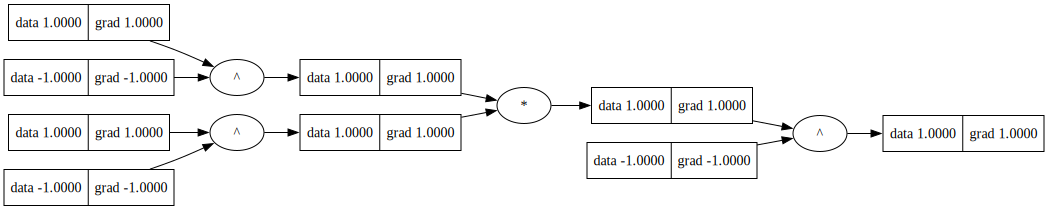

In [9]:
# check composition
from engine import Bool
from utils import draw_dot


y = Bool(-1);
x1 = Bool(1); x2 = Bool(1)
w1 = Bool(-1); w2 = Bool(-1); 

h1 = x1^w1
h2 = x2^w2

z = h1*h2
L = z^y

L.backward()

draw_dot(L)